In [0]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
# Importar dados a partir do raw do github

nba_2013     = pd.read_csv(
    'https://raw.githubusercontent.com/icd-ufmg/data/master/nba2013.csv'
)

nba_salaries = pd.read_csv(
    'https://raw.githubusercontent.com/icd-ufmg/data/master/nba_salaries.csv'
)

# **Estatistica Geral dos Datasets**

In [50]:
nba_2013.describe()

,Height,Weight,Age in 2013
count,505.000000,505.000000,505.000000
mean,79.065347,220.673267,26.190099
std,3.454019,26.643110,4.325485
min,69.000000,157.000000,15.000000
25%,76.000000,200.000000,23.000000
50%,80.000000,220.000000,25.000000
75%,82.000000,240.000000,29.000000
max,87.000000,290.000000,40.000000


In [51]:
nba_salaries.describe()

,SALARY
count,417.000000
mean,5.074814
std,5.221437
min,0.030888
25%,1.270964
50%,3.000000
75%,7.000000
max,25.000000


#**Encontrar Colunas em Comum entre os Datasets**

In [52]:
nba_2013.dtypes

Name           object
Position       object
Height          int64
Weight          int64
Age in 2013     int64
dtype: object

In [53]:
nba_salaries.dtypes

PLAYER       object
POSITION     object
TEAM         object
SALARY      float64
dtype: object

In [0]:
# renomear colunas para junção
nba_2013.columns = [
    'JOGADOR',
    'POSICAO',
    'ALTURA',
    'PESO',
    'IDADE'
]

nba_salaries.columns = [
    'JOGADOR',
    'POSICAO',
    'TIME',
    'SALARIO'
]

In [55]:
nba_2013.head(1)

,JOGADOR,POSICAO,ALTURA,PESO,IDADE
0,DeQuan Jones,Guard,80,221,23


In [56]:
nba_salaries.head(1)

,JOGADOR,POSICAO,TIME,SALARIO
0,Paul Millsap,PF,Atlanta Hawks,18.671659


In [65]:
nba_analisys = pd.merge(nba_2013, nba_salaries, left_on='JOGADOR', right_on='JOGADOR', how='outer')
nba_analisys

,JOGADOR,POSICAO_x,ALTURA,PESO,IDADE,POSICAO_y,TIME,SALARIO
0,DeQuan Jones,Guard,80.0,221.0,23.0,NaN,NaN,NaN
1,Darius Miller,Guard,80.0,235.0,23.0,NaN,NaN,NaN
2,Trevor Ariza,Guard,80.0,210.0,28.0,SF,Houston Rockets,8.193030
3,James Jones,Guard,80.0,215.0,32.0,NaN,NaN,NaN
4,Wesley Johnson,Guard,79.0,215.0,26.0,SF,Los Angeles Clippers,1.100602
5,Klay Thompson,Guard,79.0,205.0,23.0,SG,Golden State Warriors,15.501000
6,Thabo Sefolosha,Guard,79.0,215.0,29.0,SF,Atlanta Hawks,4.000000
7,Chase Budinger,Guard,79.0,218.0,25.0,SF,Indiana Pacers,5.000000
8,Kevin Martin,Guard,79.0,185.0,30.0,SG,Minnesota Timberwolves,7.085000
9,Evan Fournier,Guard,79.0,206.0,20.0,SG,Orlando Magic,2.288205


## POSIÇÃO DO JOGADOR

> Pode-se constatar que  existem duas formas para se identicar a posição de um jogador da **NBA**, então será feita uma tratativa para que o nome dessas posições sejam identificadas de uma mesma maneira, de preferência em português-br.



Segundo (Wikipédia, 2019), existem 5 posições em um jogo de basquebol, são essas:

1. Armador
2. Ala
3. Ala/Armador
4. Ala/Pivô
5. Pivô

Também reconhecidas respectivamente como: Point Guard (PG), Small Forward (SF), Shooting Guard (SG), Power Forward (PF), Center (C).


Referência: https://pt.wikipedia.org/wiki/Basquetebol

Para tratamento e conformidade destes dados foi elaborado a seguinte proposta:

In [66]:
def position_rbusiness(value):
  if value == 'PG' or value.upper() in 'POINT GUARD':
    return 'ARMADOR'
  if value == 'SF' or value.upper() in 'SMALL FORWARD':
    return 'ALA'
  if value == 'SG' or value.upper() in 'SHOOTING GUARD':
    return 'ALA/ARMADOR'
  if value == 'PF' or value.upper() in 'POWER FORWARD':
    return 'ALA/PIVO'
  if value == 'C' or value.upper() in 'CENTER':
    return 'PIVO'
  return 'NAO DEFINIDO'
  
nba_2013['POSICAO']     = nba_2013['POSICAO'].map(position_rbusiness)
nba_salaries['POSICAO'] = nba_salaries['POSICAO'].map(position_rbusiness)

nba_analisys = pd.merge(nba_2013, nba_salaries, left_on='JOGADOR', right_on='JOGADOR', how='inner')
nba_analisys

,JOGADOR,POSICAO_x,ALTURA,PESO,IDADE,POSICAO_y,TIME,SALARIO
0,Trevor Ariza,ARMADOR,80,210,28,ALA,Houston Rockets,8.193030
1,Wesley Johnson,ARMADOR,79,215,26,ALA,Los Angeles Clippers,1.100602
2,Klay Thompson,ARMADOR,79,205,23,ALA/ARMADOR,Golden State Warriors,15.501000
3,Thabo Sefolosha,ARMADOR,79,215,29,ALA,Atlanta Hawks,4.000000
4,Chase Budinger,ARMADOR,79,218,25,ALA,Indiana Pacers,5.000000
5,Kevin Martin,ARMADOR,79,185,30,ALA/ARMADOR,Minnesota Timberwolves,7.085000
6,Evan Fournier,ARMADOR,79,206,20,ALA/ARMADOR,Orlando Magic,2.288205
7,James Ennis,ARMADOR,79,201,23,ALA,Memphis Grizzlies,0.845059
8,Kyle Korver,ARMADOR,79,212,32,ALA/ARMADOR,Atlanta Hawks,5.746479
9,Sergey Karasev,ARMADOR,79,197,19,ALA/ARMADOR,Brooklyn Nets,1.599840


# Indíce de jogadores mais altos da NBA (2013)

In [103]:
analisys_altura = nba_analisys['ALTURA'].value_counts().head(5)

for index, item in enumerate(analisys_altura.items()):
  print("(%sº) %s jogadores com altura de 1.%scm" % (index + 1, item[1], item[0]))

(1º) 32 jogadores com altura de 1.81cm
(2º) 32 jogadores com altura de 1.79cm
(3º) 30 jogadores com altura de 1.82cm
(4º) 27 jogadores com altura de 1.78cm
(5º) 25 jogadores com altura de 1.80cm


## As informações podem ser descritas no gráfico a seguir:

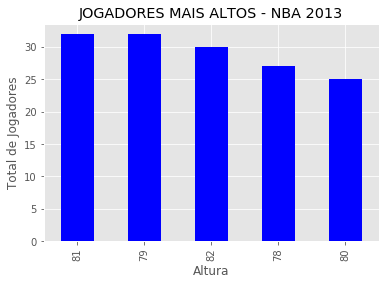

In [112]:
nba_analisys['ALTURA'].value_counts().head(5).plot(kind='bar', color='blue')

plt.title('JOGADORES MAIS ALTOS - NBA 2013')
plt.xlabel('Altura')
plt.ylabel('Total de Jogadores')

plt.show()